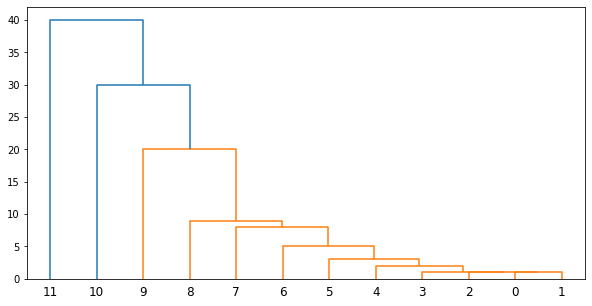

In [2]:
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import numpy as np

X = np.array([[i] for i in [0,1,2,3,5,8,13,21,30,50,80,120]])
Z = linkage(X, 'single') # 계층적 군집화 함수 linkage(), 'single'은 두 군집의 가장 가까운 샘플의 거리를 기준으로 계산
plt.figure(figsize=(10,5))
dendrogram(Z)
plt.show()

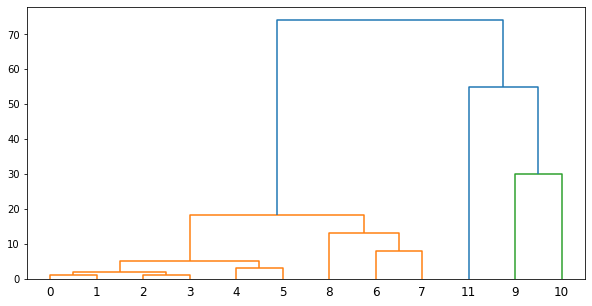

In [3]:
Z = linkage(X, 'average') # 두 군집의 모든 데이터의 평균 거리를 기준으로 구분
plt.figure(figsize=(10,5))
dendrogram(Z)
plt.show()

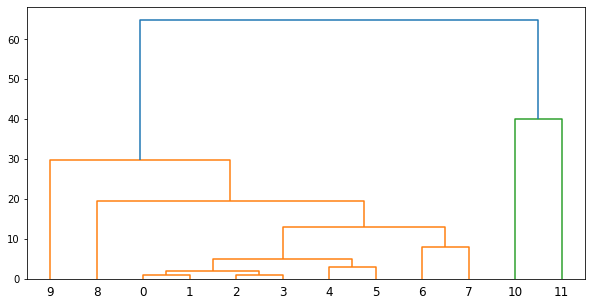

In [4]:
Z = linkage(X, 'weighted') # 가중 거리 방식
plt.figure(figsize=(10,5))
dendrogram(Z)
plt.show()

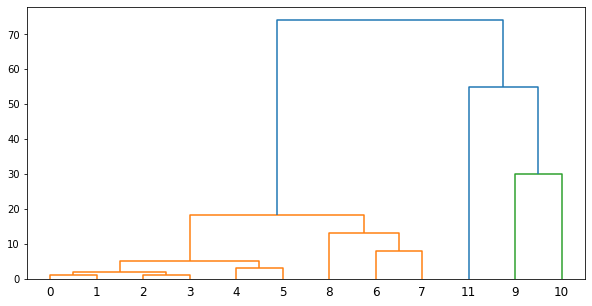

In [5]:
Z = linkage(X, 'centroid') # 두 군집의 중심점의 거리를 기준으로 계산
plt.figure(figsize=(10,5))
dendrogram(Z)
plt.show()

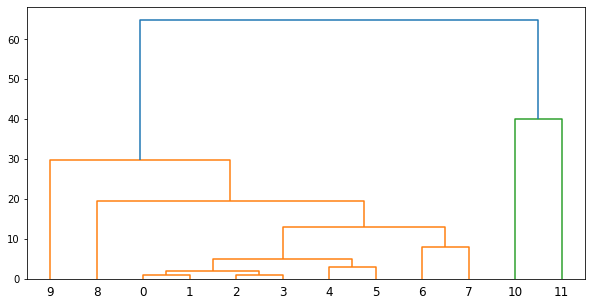

In [6]:
Z = linkage(X, 'median')
plt.figure(figsize=(10,5))
dendrogram(Z)
plt.show()

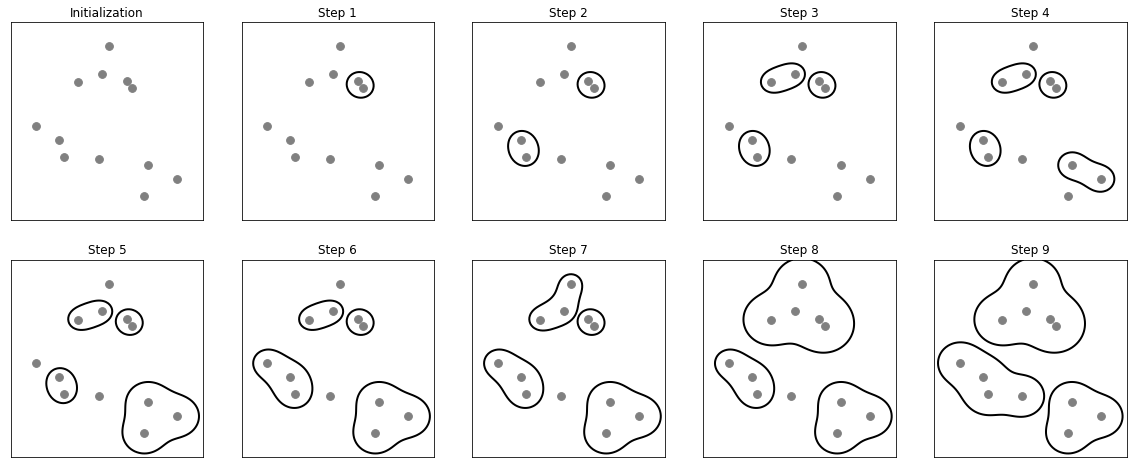

In [7]:
import mglearn

mglearn.plots.plot_agglomerative_algorithm()

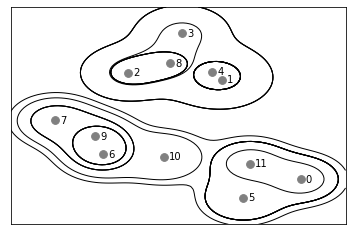

In [8]:
mglearn.plots.plot_agglomerative()

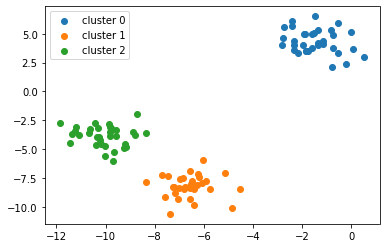

In [3]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import mglearn

x, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3) # 계층적 군집화를 지원하는 모형
assign = agg.fit_predict(x)

a = assign.reshape(-1,1)
x1 = np.hstack([x,a])

x_0 = x1[x1[:,2]==0, :]
x_1 = x1[x1[:,2]==1, :]
x_2 = x1[x1[:,2]==2, :]

plt.scatter(x_0[:,0], x_0[:,1],cmap=mglearn.cm3)
plt.scatter(x_1[:,0], x_1[:,1],cmap=mglearn.cm3)
plt.scatter(x_2[:,0], x_2[:,1],cmap=mglearn.cm3)
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc=2)
plt.show()

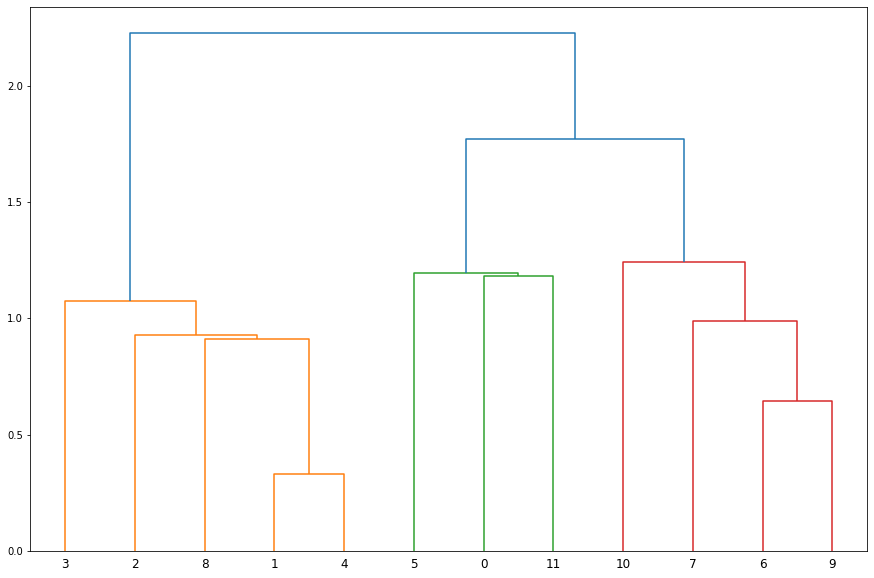

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

x, y = make_blobs(random_state=0, n_samples=12)
Z = linkage(x, 'single')
plt.figure(figsize=(15,10))
dendrogram(Z)
plt.show()

In [ ]:
# DBSCAN 군집화

In [ ]:
# kmeans는 이웃의 수를 정해줘야 하는데 dbscan은 최소거리와 최소데이터 수를 정해줘야함

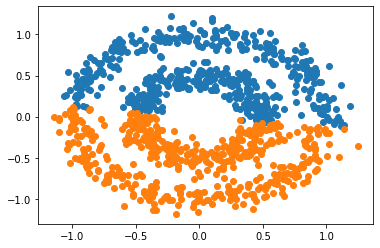

In [5]:
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import numpy as np

np.random.seed(2)
X1, y1 = make_circles(n_samples=1000, factor=.5, noise=.09)

model = KMeans(n_clusters=2, random_state=10)
model.fit(X1)
plt.scatter(X1[model.labels_ == 0,0], X1[model.labels_ == 0,1])
plt.scatter(X1[model.labels_ == 1,0], X1[model.labels_ == 1,1])

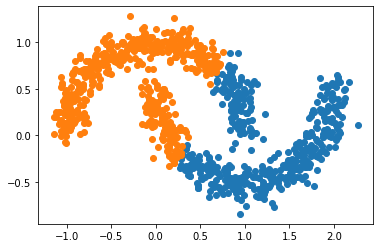

In [6]:
from sklearn.datasets import make_moons

X2, y2 = make_moons(n_samples=1000, noise=.1)
model = KMeans(n_clusters=2, random_state=10)
model.fit(X2)
plt.scatter(X2[model.labels_ == 0,0], X2[model.labels_ == 0,1])
plt.scatter(X2[model.labels_ == 1,0], X2[model.labels_ == 1,1])

DBSCAN(eps=3, min_samples=2)
[ 0  0  0  1  1  2  2 -1]


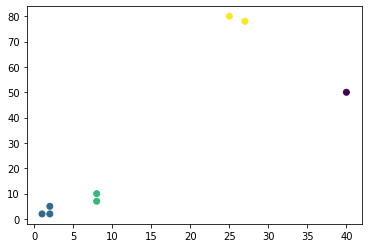

In [11]:
from sklearn.cluster import DBSCAN
import numpy as np

X = np.array([[1,2],[2,2],[2,5],[8,7],[8,10],[25,80],[27,78],[40,50]])
model = DBSCAN(eps=3, min_samples=2).fit(X)
print(model)
plt.scatter(X[:,0],X[:,1],c=model.labels_)
print(model.labels_)

# 분류가 안 된 데이터(noise)는 -1로 나옴

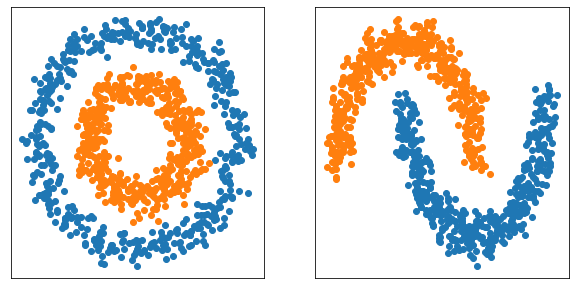

In [8]:
# DBscan은 밀도 기반

def plot_DBSCAN(title, X, eps):
    model = DBSCAN(eps=eps, min_samples=5)
    model.fit_predict(X)
    plt.scatter(X[model.labels_ == 0,0], X[model.labels_ == 0,1])
    plt.scatter(X[model.labels_ == 1,0], X[model.labels_ == 1,1])
    plt.xticks(())
    plt.yticks(())

plt.figure(figsize=(10,5))
plt.subplot(121)
plot_DBSCAN("circle", X1, 0.1)
plt.subplot(122)
plot_DBSCAN("moon", X2, 0.1)

In [1]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv("/Users/ian/Desktop/Study/data/iris/iris.csv")
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name',
       'Species'],
      dtype='object')

In [2]:
cols = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
X = df[cols]
y = df["Species"]

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

scaler = StandardScaler()
model = DBSCAN(eps=0.5, min_samples=5) # 거리 0.5 안에 샘플 5개 이상 있으면 클러스터링
pipeline = make_pipeline(scaler,model)

pred = pd.DataFrame(pipeline.fit_predict(X))
pred.columns=["predict"]

result = pd.concat([X,y,pred],axis=1)

result.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,predict
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [4]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1])

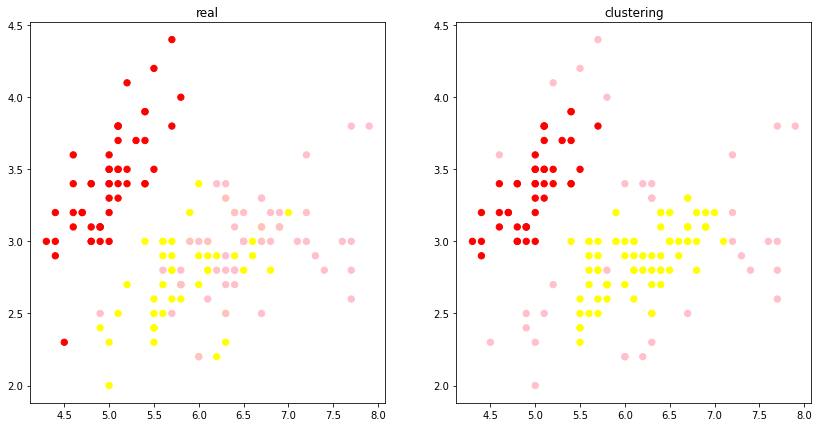

In [6]:
import numpy as np

plt.figure(figsize=(14,7))
colormap = np.array(['red', 'yellow', 'pink'])

plt.subplot(1,2,1)
plt.scatter(result['SepalLength'], result['SepalWidth'], c=colormap[y], s=40)
plt.title('real')

plt.subplot(1,2,2)
plt.scatter(result['SepalLength'], result['SepalWidth'], c=colormap[model.labels_], s=40)
plt.title('clustering')
plt.show()

/var/folders/96/h5kgn7_s0nd40p92psr15zbm0000gn/T/ipykernel_935/1906395580.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0,0,.95,1], elev=48, azim=134)


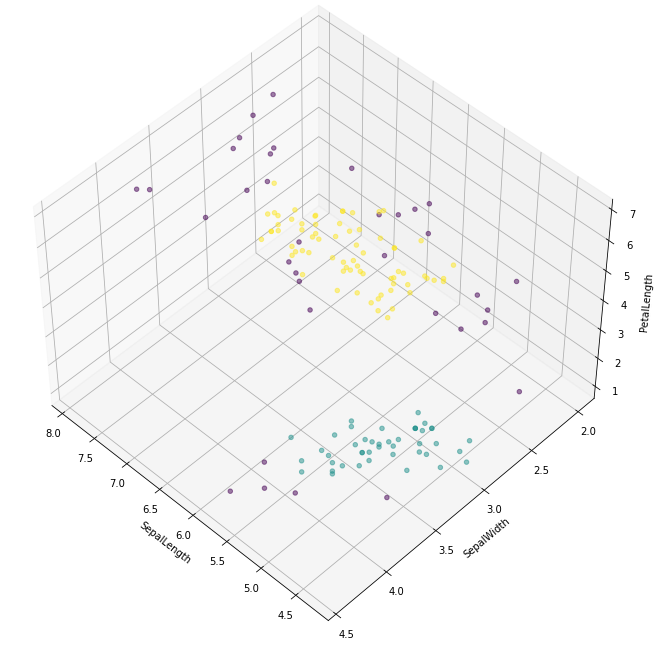

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,9))
ax = Axes3D(fig, rect=[0,0,.95,1], elev=48, azim=134)

# x좌표 SepalLength, y좌표 SepalWidth, z좌표 PetalLength
ax.scatter(result['SepalLength'], result['SepalWidth'], result['PetalLength'], c=result['predict'], alpha=0.5)
ax.set_xlabel('SepalLength')
ax.set_ylabel('SepalWidth')
ax.set_zlabel('PetalLength')
plt.show()